In [14]:
# open train.csv as pandas dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [15]:
train.shape

(9324, 6)

In [16]:
train.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [17]:
# delete 'binary-label' column
train = train.drop('binary-label', axis=1)
train.head()

,id,source,sentence_1,sentence_2,label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0


In [18]:
train.dtypes

id             object
source         object
sentence_1     object
sentence_2     object
label         float64
dtype: object

In [19]:
train.isnull().sum()

id            0
source        0
sentence_1    0
sentence_2    0
label         0
dtype: int64

In [20]:
train.describe()

,label
count,9324.000000
mean,1.849968
std,1.602212
min,0.000000
25%,0.200000
50%,1.600000
75%,3.400000
max,5.000000


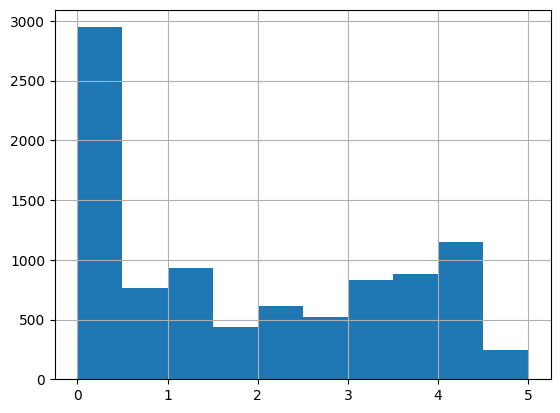

In [21]:
train['label'].hist()
plt.show()

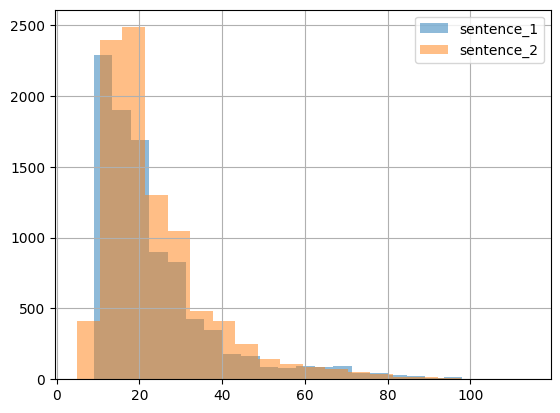

In [22]:
train['len_sentence_1'] = train['sentence_1'].apply(len)
train['len_sentence_2'] = train['sentence_2'].apply(len)
train['len_sentence_1'].hist(bins=20, alpha=0.5, label='sentence_1')
train['len_sentence_2'].hist(bins=20, alpha=0.5, label='sentence_2')
plt.legend()
plt.show()


In [23]:
train['len_sentence_1'].describe()

count    9324.000000
mean       23.258151
std        14.395189
min         9.000000
25%        14.000000
50%        19.000000
75%        28.000000
max        98.000000
Name: len_sentence_1, dtype: float64

In [24]:
train['len_sentence_2'].describe()

count    9324.000000
mean       23.726405
std        13.385380
min         5.000000
25%        15.000000
50%        20.000000
75%        28.000000
max       114.000000
Name: len_sentence_2, dtype: float64

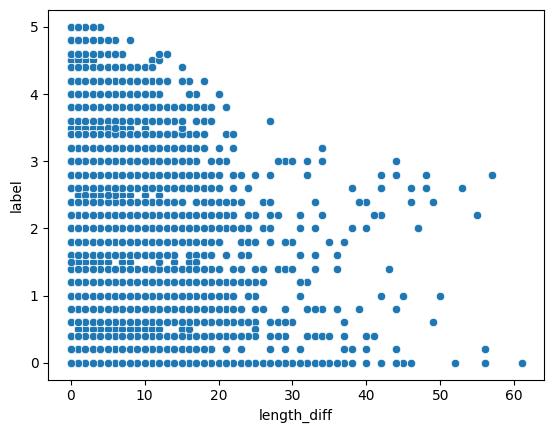

In [25]:
train['length_diff'] = abs(train['len_sentence_1'] - train['len_sentence_2'])
sns.scatterplot(x='length_diff', y='label', data=train)
plt.show()

In [26]:
train.groupby('source')['label'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
nsmc-rtt,788.0,3.303426,1.047706,0.0,3.0,3.6,4.0,5.0
nsmc-sampled,2296.0,1.323476,1.277747,0.0,0.2,1.0,2.2,5.0
petition-rtt,817.0,3.590208,1.048120,0.0,3.2,3.8,4.2,5.0
petition-sampled,2352.0,1.436692,1.472262,0.0,0.0,1.0,2.6,5.0
slack-rtt,1047.0,3.364088,1.010173,0.0,3.0,3.6,4.0,5.0
slack-sampled,2024.0,0.875889,1.169011,0.0,0.0,0.4,1.4,5.0


In [27]:
train.duplicated(subset=['sentence_1', 'sentence_2']).sum()

0

In [28]:
from collections import Counter
all_words = ' '.join(train['sentence_1'] + ' ' + train['sentence_2']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))

[('너무', 689), ('수', 530), ('정말', 469), ('ㅋㅋ', 385), ('것', 323), ('영화', 323), ('이', 288), ('ㅎㅎ', 286), ('진짜', 280), ('대한', 278), ('잘', 274), ('더', 261), ('있는', 238), ('<PERSON>', 222), ('및', 210), ('많이', 205), ('저도', 198), ('또', 197), ('좋은', 187), ('왜', 185)]


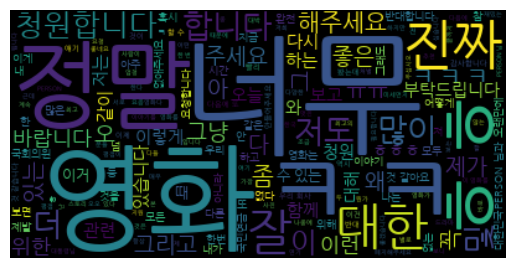

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# find data that <PERSON> contains in sentence_1
persons = train[train['sentence_1'].str.contains('<')]
not_persons = persons[~persons['sentence_1'].str.contains('PERSON')]
not_persons.head(100)

,id,source,sentence_1,sentence_2,label,len_sentence_1,len_sentence_2,length_diff
2840,boostcamp-sts-v1-train-2840,nsmc-sampled,휴지덮고 자다가 놀라는 쥐표정 >.< 아직도 안잊혀지는ㅎㅎ,"ㅡ,.ㅡ"" 보다가 확 닫은영화.",0.0,32,17,15
4518,boostcamp-sts-v1-train-4518,nsmc-rtt,배우 연기력도 연출도 코폴라를 거장으로 만들어준 <대부 트릴로지>의 코스프레,코폴라를 연기와 연출의 거장으로 만든 <대부 3부작> 코스프레.,3.6,42,35,7
5464,boostcamp-sts-v1-train-5464,petition-rtt,< 학생 인권 증진을 위한 두발 제한을 금지하는 법을 제정해주십시오>,< 학생인권 증진을 위해 머리카락 제한 금지법을 제정해주세요 >,4.6,38,35,3
6216,boostcamp-sts-v1-train-6216,nsmc-sampled,레이첼 맥아담스는 <어바웃 타임> 도 그렇고 시간 여행 이야기를 어떻게 그렇게 잘 찍을까,나중에 남편을 계속 기다리는 레이첼 맥아담스의 모습이 아련해,0.8,49,33,16
7808,boostcamp-sts-v1-train-7808,nsmc-rtt,꺅><><><넘 귀여운영화ㅠㅠ,CK><><><너무 귀여운 영화네요 ㅠㅠ,4.0,16,22,6
8955,boostcamp-sts-v1-train-8955,nsmc-sampled,진짜 유쾌 그 자체!!!><,이영하짱잼없음!!!!!!!!ㅡㅡ,0.2,15,17,2


In [39]:
test = train[train['sentence_1'].str.contains('요\.')]

# dele columns: len_sentence_1, len_sentence_2, length_diff
test = test.drop(['id', 'source', 'len_sentence_1', 'len_sentence_2', 'length_diff', 'label', 'sentence_2'], axis=1)
test.head(5)

,sentence_1
2,주택청약조건 변경해주세요.
7,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ
9,크림하우스 환불조치해주세요.
16,환갑이면? ㅎㅎㅎ 이런 재미난 얘기하느라 시간이 금방 가더라고요.
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..


In [42]:
import re
def temp_test(sentence):
    return re.sub(r'요\.', '요요요', sentence)

test['sentence_test'] = test['sentence_1'].apply(temp_test)
test.head(5)

,sentence_1,sentence_test
2,주택청약조건 변경해주세요.,주택청약조건 변경해주세요요요
7,이렇게 귀여운 쥐들은 처음이네요.ㅎㅎㅎ,이렇게 귀여운 쥐들은 처음이네요요요ㅎㅎㅎ
9,크림하우스 환불조치해주세요.,크림하우스 환불조치해주세요요요
16,환갑이면? ㅎㅎㅎ 이런 재미난 얘기하느라 시간이 금방 가더라고요.,환갑이면? ㅎㅎㅎ 이런 재미난 얘기하느라 시간이 금방 가더라고요요요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요요요.


In [43]:
train[train['sentence_1'].str.contains('스릴도있고')]

,id,source,sentence_1,sentence_2,label,len_sentence_1,len_sentence_2,length_diff
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,38,20,18
